In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import gridspec
import h5py
from scipy.interpolate import RegularGridInterpolator as rgi

mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['legend.handlelength']=2
mpl.rcParams['legend.fontsize']=16
mpl.rcParams['legend.frameon']=False
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['xtick.labelsize']=16
mpl.rcParams['ytick.labelsize']=16
mpl.rcParams['legend.labelspacing'] = 0.1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['xtick.direction'] = 'inout'

In [2]:
def read_data(base):
    file = open(base+".xg",'r')
    data = {}
    cont = True
    while (cont):
        line = file.readline()
        if line=='':
            cont = False
            continue
        time = line[11:]
        data[time] = {}
        rad = np.zeros(650)
        value = np.zeros(650)
        line = file.readline()
        line = file.readline()
        line = file.readline()
        line = file.readline()
        for i in range(650):
            line = file.readline().split()
            rad[i] = float(line[0])
            value[i] = float(line[1])

        data[time]["rad"] = rad
        data[time]["value"] = value
        line = file.readline()
        line = file.readline()
        line = file.readline()
        line = file.readline()
        line = file.readline()
        line = file.readline()
    return data

In [3]:
fulldata = {}
base = "../data/"
values = ['rho','temperature','ye','v','alpha','X']
for value in values:
    fulldata[value] = read_data(base+value)
    
for time in fulldata[values[0]]:
    lasttime=time

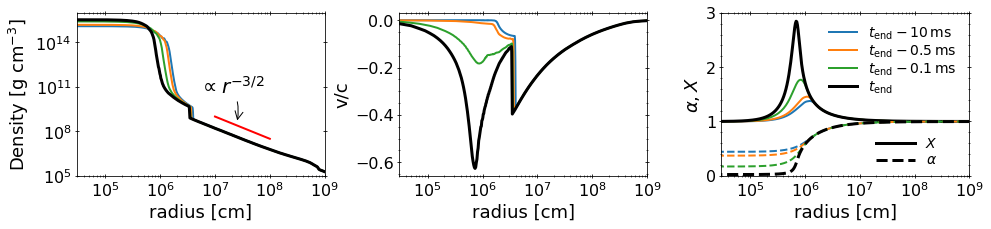

In [4]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(16, 3))
plt.subplots_adjust(wspace=0.3,hspace=0)

needtonems=True
for t in fulldata['alpha']:
    if float(t)>0.904 and needtonems:
        tonems = t
        needtonems = False

needonems=True
for t in fulldata['alpha']:
    if float(t)>0.913 and needonems:
        onems = t
        needonems = False

needpfivems=True
for t in fulldata['alpha']:
    if float(t)>0.91468440014846497-0.0005 and needpfivems:
        pfivems = t
        needpfivems = False
        
needponems=True
for t in fulldata['alpha']:
    if float(t)>0.91468440014846497-0.0001 and needponems:
        ponems = t
        needponems = False
    
ax0.plot(fulldata['rho'][tonems]['rad'],fulldata['rho'][tonems]['value'])
ax0.plot(fulldata['rho'][pfivems]['rad'],fulldata['rho'][pfivems]['value'])
ax0.plot(fulldata['rho'][ponems]['rad'],fulldata['rho'][ponems]['value'])
ax0.plot(fulldata['rho'][lasttime]['rad'],fulldata['rho'][lasttime]['value'],'k',linewidth=3)
ax0.set_ylabel(r"Density [g cm$^{-3}$]")

ax1.plot(fulldata['v'][tonems]['rad'],fulldata['v'][tonems]['value']/29979245800.)
ax1.plot(fulldata['v'][pfivems]['rad'],fulldata['v'][pfivems]['value']/29979245800.)
ax1.plot(fulldata['v'][ponems]['rad'],fulldata['v'][ponems]['value']/29979245800.)
ax1.plot(fulldata['v'][lasttime]['rad'],fulldata['v'][lasttime]['value']/29979245800.,'k',linewidth=3)
ax1.set_ylabel("v/c")

ax2.plot(fulldata['X'][tonems]['rad'],fulldata['X'][tonems]['value'],label=r"$t_\mathrm{end}-10\,$ms")
ax2.plot(fulldata['X'][pfivems]['rad'],fulldata['X'][pfivems]['value'],label=r"$t_\mathrm{end}-0.5\,$ms")
ax2.plot(fulldata['X'][ponems]['rad'],fulldata['X'][ponems]['value'],label=r"$t_\mathrm{end}-0.1\,$ms")
ax2.plot(fulldata['X'][lasttime]['rad'],fulldata['X'][lasttime]['value'],'k',linewidth=3,label=r"$t_\mathrm{end}$")

ax2.plot(fulldata['alpha'][tonems]['rad'],fulldata['alpha'][tonems]['value'],"C0--")
ax2.plot(fulldata['alpha'][pfivems]['rad'],fulldata['alpha'][pfivems]['value'],"C1--")
ax2.plot(fulldata['alpha'][ponems]['rad'],fulldata['alpha'][ponems]['value'],"C2--")
ax2.plot(fulldata['alpha'][lasttime]['rad'],fulldata['alpha'][lasttime]['value'],'k--',linewidth=3)

ax2.plot([2e7,1e8],[0.6,0.6],'k',linewidth=3)
ax2.plot([2e7,1e8],[0.3,0.3],'k--',linewidth=3)
ax2.annotate(r"$X$",
            xy=(2e8, 0.6), xycoords='data',
            xytext=(2e8, 0.6), textcoords='data',
            size=14, va="center", ha="center")
ax2.annotate(r"$\alpha$",
            xy=(2e8, 0.3), xycoords='data',
            xytext=(2e8, 0.3), textcoords='data',
            size=14, va="center", ha="center")

ax2.set_ylim(0,3)

ax2.legend(fontsize=14)

ax2.set_ylabel(r"$\alpha, X$")

xl = [1e7,1e8]
yl = [1e9,1e9*(10**-1.5)]
ax0.plot(xl,yl,'red')
ax0.annotate(r"$\propto r^{-3/2}$",
            xy=(2.5e7, 4e8), xycoords='data',
            xytext=(2e7, 1e11), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"),
            )


ax0.set_xscale('log')
ax0.set_xlim(3e4,10e8)
ax0.set_yscale('log')
ax0.set_ylim(1e5,1e16)


ax0.set_xlabel("radius [cm]")
ax1.set_xlabel("radius [cm]")
ax2.set_xlabel("radius [cm]")


plt.savefig("matter_props.pdf",bbox_inches='tight')
plt.show()